# Lab 5

## Higgs Overview

In this problem we will be looking for the standard model of the Higgs Boson, in proton-proton collisions at centre of mass energy of 13 TeV, at the Large Hadron Collider(LHC) using simulated data from [A. Schuy](https://github.com/AlexSchuy/qsvm_jet_tagging/tree/master/qsvm_jet_tagging/generation).

#### What is the Higgs Boson?
Put simply, the Higgs boson is what allows us to explain why subatomic particles have mass. The Higgs boson operates on the theory of an energy field that permeates the entire universe(known as the Higgs field). The mass of subatomic particles is determined by how much they interact with this Higgs field.

Using water as an analogy for the Higgs field: a fish moving really smoothly through water because its body is streamlined, is analagous to a low-mass particle with minimal interaction with the Higgs field. While a human swimming and splashing through the water, is analogous to a massive particle, heavily interacting with the higgs field. Just like a pool is made up of water molecules, so is the higgs field made up of higgs bosons.

#### What is the Large Hadron Collider? What does it have to do with the Higgs Boson?
The Large Hadron Collider is a 27 kilometer long particle accelerator that smashes protons against each other. By smashing protons against each other scientists can find what protons are made out of(neutrons, kaons, pions, muons, neutrinos), as well as interact with the higgs field. Smashing protons creates quantum excitation in the higgs field, which creates the possibility of flicking off a higgs particle. This event is extrememly rare and happens approximately once in every trillion pp collisions.

The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters.

## Exploring the Dataset

For these data sets we will be using the pickle module for binary serialization and deserialization. 

#### Categories

 - pt - Corresponds to the transverse momentum in the xy-plane of the proton to proton collisions in the LHC.
 - eta(n) - or theta is the pseudorapidity, or the angle of a particle relative to the beam axis. The angle of the particle in the z-y plane.
 - phi - The azimuthal angle responsible for the angle of the particle in x-y plane.
 - mass - invariant mass, or the intrinsic mass of the system of objects independent of the overall motion of the system.
 - ee2(e2) - 2-point ECF ratio, is the energy correlation function ratio for 2-point correlators. Particularly useful for quark/gluon discrimination.
 - ee3(e3) - 3-point ECF ratio, is the energy correlation function ratio for 3-point correlators. Particularly useful for boosted W/Z/Higgs boson identification.
 - d2 - 3 to 2 point ECF ratio
 - angularity(tau) - Specific orientation of one feature to another at a referenced angle.
 - Jet - signatures of quarks,gluons,etc. created in high-energy collisions. 
 - N- subjettiness - a jet shape designed to identify boosted hadronic objects such as top quarks. Given N subjet axes within a jet, N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis.
 - t1 - 1-subjettiness
 - t2 - 2-subjettiness
 - t3 - 3-subjettiness
 - t21 - 21-subjettiness
 - t32 - 32-subjettiness
 - KtDeltaR - delta R of two subjets within the large-R jet
 
#### Datasets
2 files each containing 100k jets. Higgs is the signal dataset while Qcd is the background dataset.

In [7]:
# import library
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import statistics
import math

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs = pickle.load(infile)

infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd = pickle.load(infile2)

# list all keys of the files
print("Higgs Signal categories: ", higgs.keys())
print("QCD background categories: ", qcd.keys())

Higgs Signal categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
QCD background categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


## Exploring the Datasets

Provided were two data sets both with 100k jets: the first one is the signal dataset, while the second one is the background data set. Both datasets contain the same categories for measurement. Exploration of the data includes analyzing the shape of the data as well as how the signal data compares to the background data.

Firstly, we are evaluating the transverse momentum of 
This first plot show cases the distribution of transverse momentum for the signal data set. As we can see here the values are limited between 1000-1200 GeV. The data is leftskewed, where the upper momentum values occur more frequentl

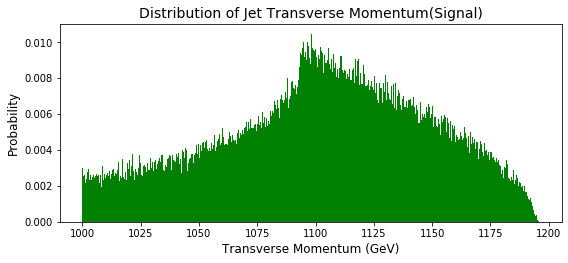

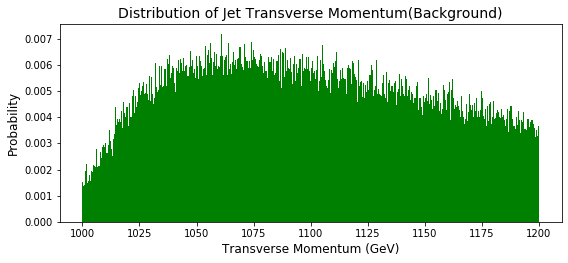

In [98]:
#pt - Corresponds to the transverse momentum in the xy-plane of the proton to proton collisions in the LHC.

plt.rcParams["figure.figsize"] = (9,8)  
 
bins = 500    

plt.subplot(2,1,1)
plt.hist(higgs['pt'][:], bins, color = 'green', histtype = 'bar',
        density=True) 
plt.xlabel('Transverse Momentum (GeV)', fontsize=12) 
plt.ylabel('Probability', fontsize=12) 
plt.title('Distribution of Jet Transverse Momentum(Signal)', fontsize=14) 
   
plt.subplot(2,1,2)
plt.hist(qcd['pt'][:], bins, color = 'green', histtype = 'bar',
        density=True) 
plt.xlabel('Transverse Momentum (GeV)', fontsize=12) 
plt.ylabel('Probability', fontsize=12) 
plt.title('Distribution of Jet Transverse Momentum(Background)', fontsize=14) 
plt.show()

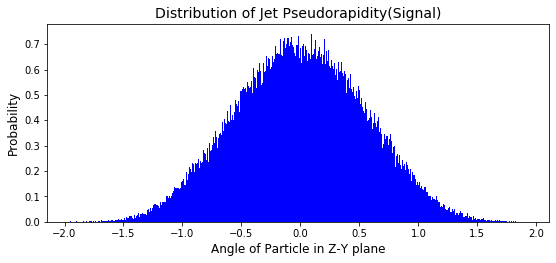

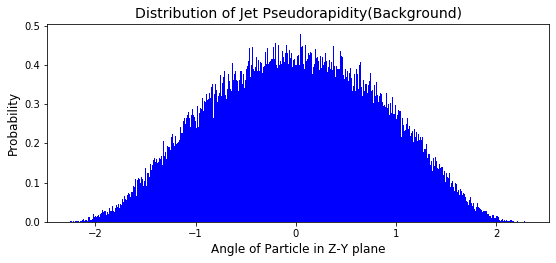

In [101]:
#eta(n) - or theta is the pseudorapidity, or the angle of a particle relative to the beam axis. The angle of the particle in the z-y plane.

plt.rcParams["figure.figsize"] = (9,8)  
 
bins = 500    
plt.subplot(2,1,1)
plt.hist(higgs['eta'][:], bins, color = 'blue', histtype = 'bar',
        density=True) 
plt.xlabel('Angle of Particle in Z-Y plane', fontsize=12) 
plt.ylabel('Probability', fontsize=12) 
plt.title('Distribution of Jet Pseudorapidity(Signal)', fontsize=14) 
  
plt.subplot(2,1,2)    
plt.hist(qcd['eta'][:], bins, color = 'blue', histtype = 'bar',
        density=True) 
plt.xlabel('Angle of Particle in Z-Y plane', fontsize=12) 
plt.ylabel('Probability', fontsize=12) 
plt.title('Distribution of Jet Pseudorapidity(Background)', fontsize=14) 
plt.show()

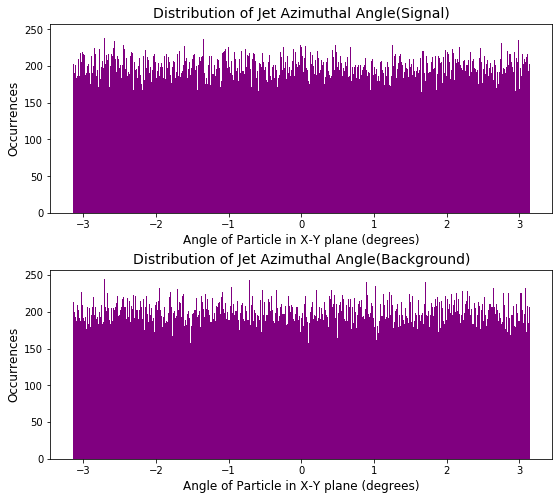

In [109]:
#phi - The azimuthal angle responsible for the angle of the particle in x-y plane.

plt.rcParams["figure.figsize"] = (9,8)  
 
bins = 500  

plt.subplot(2,1,1)
plt.hist(higgs['phi'][:], bins, color = 'purple', histtype = 'bar') 
plt.xlabel('Angle of Particle in X-Y plane (degrees)', fontsize=12) 
plt.ylabel('Occurrences', fontsize=12) 
plt.title('Distribution of Jet Azimuthal Angle(Signal)', fontsize=14) 

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.3)
plt.hist(qcd['phi'][:], bins, color = 'purple', histtype = 'bar') 
plt.xlabel('Angle of Particle in X-Y plane (degrees)', fontsize=12) 
plt.ylabel('Occurrences', fontsize=12) 
plt.title('Distribution of Jet Azimuthal Angle(Background)', fontsize=14) 
plt.show()

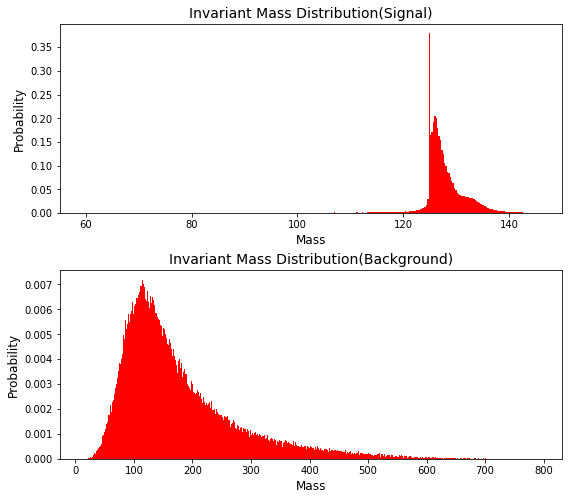

In [113]:
#mass - invariant mass, or the intrinsic mass of the system of objects independent of the overall motion of the system.

plt.rcParams["figure.figsize"] = (9,8)  
 
bins = 500    

plt.subplot(2,1,1)
plt.hist(higgs['mass'][:], bins, color = 'red', histtype = 'bar',
        density=True) 
plt.xlabel('Mass', fontsize=12) 
plt.ylabel('Probability', fontsize=12)
plt.xlim(55, 150)
plt.title('Invariant Mass Distribution(Signal)', fontsize=14) 

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.3)
plt.hist(qcd['mass'][:], bins, color = 'red', histtype = 'bar',
        density=True) 
plt.xlabel('Mass', fontsize=12) 
plt.ylabel('Probability', fontsize=12)
plt.title('Invariant Mass Distribution(Background)', fontsize=14) 
plt.show()

Text(0.5, 1.0, '3-Point ECF Ratio Distribution(Signal)')

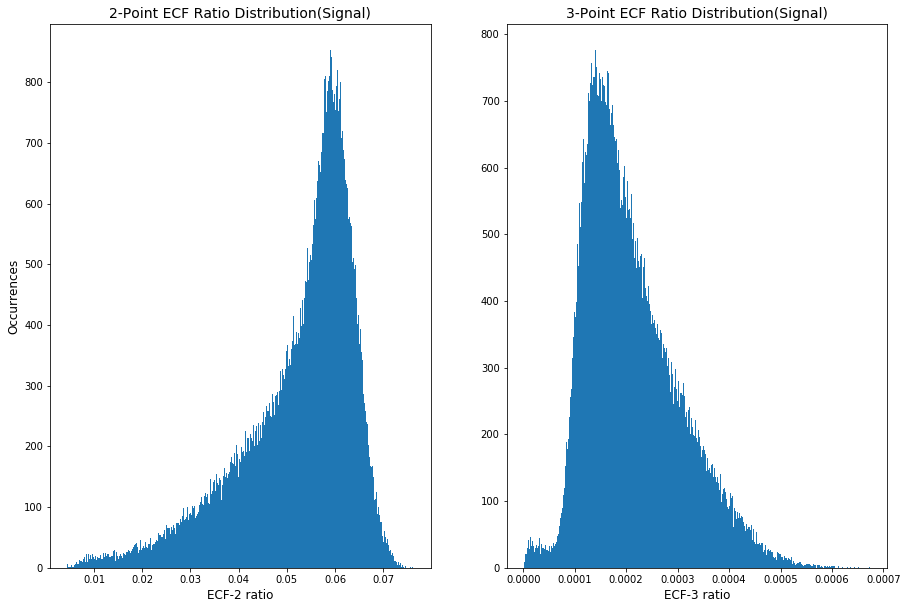

In [114]:
#ee2(e2) - 2-point ECF ratio, is the energy correlation function for 2-point correlators. Particularly useful for quark/gluon discrimination.
#ee3(e3) - 3-point ECF ratio, is the energy correlation function for 3-point correlators. Particularly useful for boosted W/Z/Higgs boson identification.

plt.rcParams["figure.figsize"] = (15,10)
    
bins = 500    

ax1 = plt.subplot(121)
plt.hist(higgs['ee2'][:], bins, histtype = 'bar') 
plt.xlabel('ECF-2 ratio', fontsize=12) 
plt.ylabel('Occurrences', fontsize=12) 
plt.title('2-Point ECF Ratio Distribution(Signal)', fontsize=14) 

ax2 = plt.subplot(122)
plt.hist(higgs['ee3'][:], bins, histtype = 'bar') 
plt.xlabel('ECF-3 ratio', fontsize=12) 
plt.title('3-Point ECF Ratio Distribution(Signal)', fontsize=14) 

Text(0.5, 1.0, '3-Point ECF Ratio Distribution(Background)')

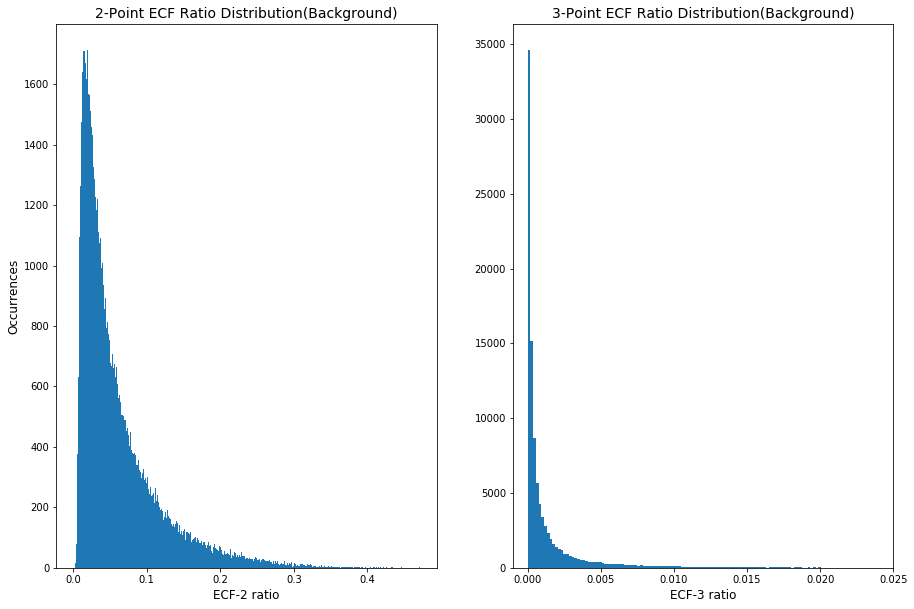

In [115]:
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 500    

ax1 = plt.subplot(121)
plt.hist(qcd['ee2'][:], bins, histtype = 'bar') 
plt.xlabel('ECF-2 ratio', fontsize=12) 
plt.ylabel('Occurrences', fontsize=12) 
plt.title('2-Point ECF Ratio Distribution(Background)', fontsize=14) 

ax2 = plt.subplot(122)
plt.hist(qcd['ee3'][:], bins, histtype = 'bar') 
plt.xlabel('ECF-3 ratio', fontsize=12) 
plt.xlim(-0.001, 0.025)
plt.title('3-Point ECF Ratio Distribution(Background)', fontsize=14) 

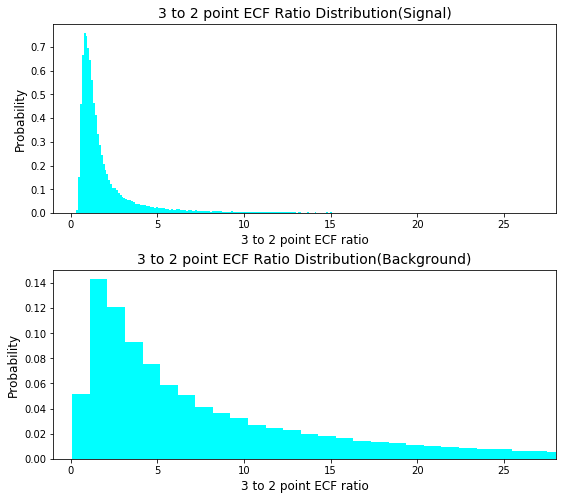

In [119]:
#d2 - 3 to 2 point ECF ratio
plt.rcParams["figure.figsize"] = (9,8)  
 
bins = 500    
  
plt.subplot(2,1,1)
plt.hist(higgs['d2'][:], bins, color = 'cyan', histtype = 'bar',
        density=True) 
plt.ylabel('Probability', fontsize=12) 
plt.xlabel('3 to 2 point ECF ratio', fontsize=12) 
plt.xlim(-1,28)
plt.title('3 to 2 point ECF Ratio Distribution(Signal)', fontsize=14) 

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.3)
plt.hist(qcd['d2'][:], bins, color = 'cyan', histtype = 'bar',
        density=True) 
plt.ylabel('Probability', fontsize=12) 
plt.xlabel('3 to 2 point ECF ratio', fontsize=12) 
plt.xlim(-1,28)
plt.title('3 to 2 point ECF Ratio Distribution(Background)', fontsize=14) 
plt.show()

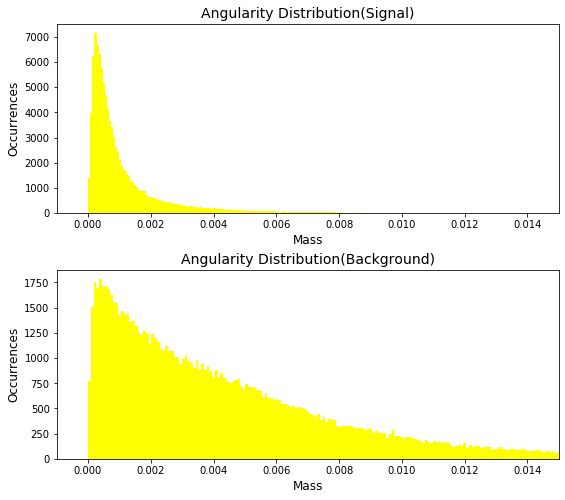

In [120]:
#angularity(tau) - Specific orientation of one feature to another at a referenced angle.

plt.rcParams["figure.figsize"] = (9,8)  
 
bins = 500    

plt.subplot(2,1,1)
plt.hist(higgs['angularity'][:], bins, color = 'yellow', histtype = 'bar')  
plt.xlabel('Mass', fontsize=12) 
plt.xlim(-0.001,0.015)
plt.ylabel('Occurrences', fontsize=12) 
plt.title('Angularity Distribution(Signal)', fontsize=14) 

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.3)
plt.hist(qcd['angularity'][:], bins, color = 'yellow', histtype = 'bar') 
plt.xlabel('Mass', fontsize=12) 
plt.xlim(-0.001,0.015)
plt.ylabel('Occurrences', fontsize=12) 
plt.title('Angularity Distribution(Background)', fontsize=14) 
plt.show()

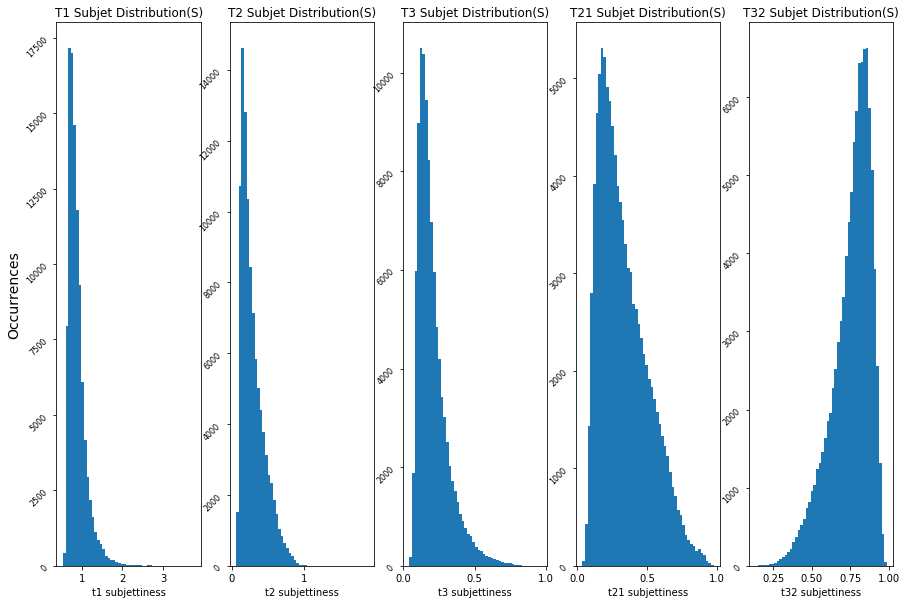

In [121]:
#N- subjettiness - a jet shape designed to identify boosted hadronic objects such as top quarks. Given N subjet axes within a jet, N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis.
#t1 - 1-subjettiness
#t2 - 2-subjettiness
#t3 - 3-subjettiness
#t21 - 21-subjettiness
#t32 - 32-subjettiness
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Occurrences', fontsize=14) 
plt.title('T1 Subjet Distribution(S)', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet Distribution(S)', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet Distribution(S)', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet Distribution(S)', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet Distribution(S)', fontsize=12) 

plt.show()

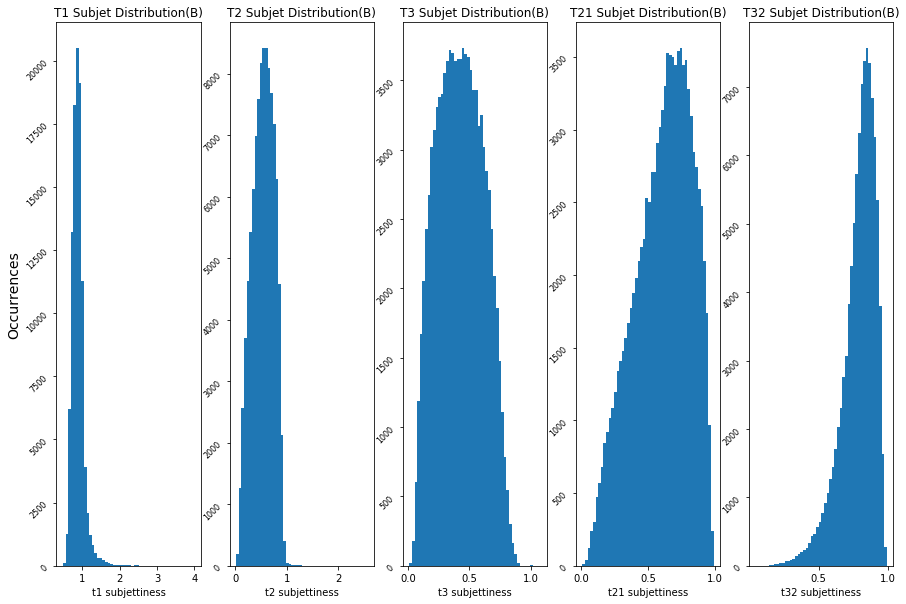

In [122]:
#N- subjettiness - a jet shape designed to identify boosted hadronic objects such as top quarks. Given N subjet axes within a jet, N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis.
#t1 - 1-subjettiness
#t2 - 2-subjettiness
#t3 - 3-subjettiness
#t21 - 21-subjettiness
#t32 - 32-subjettiness
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Occurrences', fontsize=14) 
plt.title('T1 Subjet Distribution(B)', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet Distribution(B)', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet Distribution(B)', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet Distribution(B)', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet Distribution(B)', fontsize=12) 

plt.show()

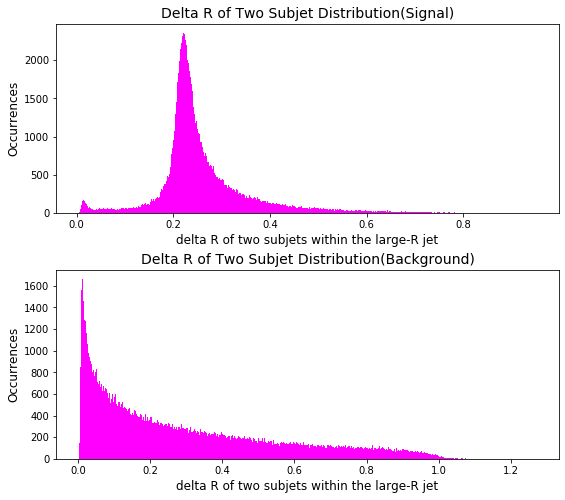

In [124]:
#KtDeltaR - delta R of two subjets within the large-R jet

plt.rcParams["figure.figsize"] = (9,8)  
 
bins = 500   

plt.subplot(2,1,1)
plt.hist(higgs['KtDeltaR'][:], bins, color = 'magenta', histtype = 'bar') 
plt.xlabel('delta R of two subjets within the large-R jet', fontsize=12) 
plt.ylabel('Occurrences', fontsize=12)
plt.title('Delta R of Two Subjet Distribution(Signal)', fontsize=14) 

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.3)
plt.hist(qcd['KtDeltaR'][:], bins, color = 'magenta', histtype = 'bar')  
plt.xlabel('delta R of two subjets within the large-R jet', fontsize=12) 
plt.ylabel('Occurrences', fontsize=12)
plt.title('Delta R of Two Subjet Distribution(Background)', fontsize=14) 
plt.show()